In [1]:
# Importing libraries for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing libraries for machine learning
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from joblib import dump,load
import shap

# Display setting for exploration
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
# Check out if the environment is the correct Anaconda one
import sys
print('environment: ',sys.executable)

# Set up directory to be the github repository
# requires git
import os
import subprocess
os.getcwd()
output = subprocess.check_output(['git', 'rev-parse', '--show-toplevel'])
path = output.decode('utf-8').strip()
print('working directory: ',path)
os.chdir(path)


environment:  c:\Users\ricca\anaconda3\envs\Thesis\python.exe
working directory:  C:/Users/ricca/Documents/GitHub/Thesis-SEM-ML


In [3]:
from Source.DataPreparation.DataProcessor import DataProcessor
from Source.Regression.latent_variable_regressors import GBoostRegression, RFRegression, LinearRegressionModel

In [4]:
# Assuming you have data in X and y variables
Results_RF = []
Results_XGB = []
Results_LM=[]
shap_values_list_RF = None
shap_values_list_xgb = None
shap_values_list_LM = None

montecarloiter=15

for i in range(montecarloiter):
    print(f"Starting the iteration n.{i+1}")

    processorclass=DataProcessor()
    processorclass.read_df()
    processorclass.split_data(test_size=0.2)
    processorclass.save_data()
    processorclass.process_CFA()

    X_train,y_train,X_test,y_test = processorclass.train_test_data_for_WEtarget(target_variable='WorkEngagement',Categories=False)

    # XGBRegressor
    Xgboost=GBoostRegression(x_train=X_train,y_train=y_train,x_test=X_test,y_test=y_test)
    Xgboost.train(verbosity=0,n_iter=60)
    mxgbresults = Xgboost.get_results()
    print(mxgbresults['best_params'])
    mse_xgb, r2_xgb, mae_xgb, train_mse_xgb, train_r2_xgb = (mxgbresults['mse'],mxgbresults['r2'],mxgbresults['mae'],mxgbresults['train_mse'],mxgbresults['train_r2'])
    Results_XGB.append((mse_xgb, r2_xgb, mae_xgb,train_mse_xgb, train_r2_xgb))

    if shap_values_list_xgb is None:
        shap_values_list_xgb = Xgboost.get_shap_values()
    else:
        shap_values_list_xgb += Xgboost.get_shap_values()
    print(f"Iteration {i+1} XGBoost: MSE: {mse_xgb}, R^2: {r2_xgb}, MAE: {mae_xgb}, TRAIN_MSE:{train_mse_xgb}, TRAIN_R^2:{train_r2_xgb}" )


    # RandomForest
    RFRegre=RFRegression(x_train=X_train,y_train=y_train,x_test=X_test,y_test=y_test)
    RFRegre.median_imputation()
    RFRegre.train(verbosity=0,n_iter=5,computeshap=False)

    mRFresults = RFRegre.get_results()
    mse_RF, r2_RF, mae_RF, train_mse_RF, train_r2_RF  = (mRFresults['mse'],mRFresults['r2'],mRFresults['mae'],mRFresults['train_mse'],mRFresults['train_r2'])
    Results_RF.append((mse_RF, r2_RF, mae_RF, train_mse_RF, train_r2_RF))


    #if shap_values_list_RF is None:
    #    shap_values_list_RF = RFRegre.get_shap_values()
    #else:
    #    shap_values_list_RF += RFRegre.get_shap_values()
    print(f"Iteration {i+1} RandomForest: MSE: {mse_RF}, R^2: {r2_RF}, MAE: {mae_RF}, TRAIN_MSE:{train_mse_RF}, TRAIN_R^2:{train_r2_RF}" )


    # Linear Regression
    LMreg= LinearRegressionModel(x_train=X_train,y_train=y_train,x_test=X_test,y_test=y_test)
    LMreg.median_imputation()
    LMreg.train(computeshap=False)
    LMresults = LMreg.get_results()
    mse_LM, r2_LM, mae_LM, train_mse_LM, train_r2_LM  = (LMresults['mse'],LMresults['r2'],LMresults['mae'],LMresults['train_mse'],LMresults['train_r2'])
    Results_LM.append((mse_LM, r2_LM, mae_LM,train_mse_LM, train_r2_LM))

    #if shap_values_list_xgb is None:
    #    shap_values_list_xgb = Xgboost.get_shap_values()
    #else:
    #    shap_values_list_xgb += Xgboost.get_shap_values()
    print(f"Iteration {i+1} Linear Regression: MSE: {mse_LM}, R^2: {r2_LM}, MAE: {mae_LM}, TRAIN_MSE:{train_mse_LM}, TRAIN_R^2:{train_r2_LM}")

    print(("-------------------------------------------------"))



#shap_values_list_RF /= 10
shap_values_list_xgb /= montecarloiter
#shap_values_list_LM /= 10

Starting the iteration n.1
Starting the XGBRegressor training
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': 0.6581271070436121, 'colsample_bynode': None, 'colsample_bytree': 0.6147428818052545, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0.25806752011697887, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.030509710262967067, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 4, 'max_leaves': None, 'min_child_weight': 5, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 300, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': None, 'reg_alpha': 0.07214137351165001, 'reg_lambda': 0.7694596885527438, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.5, 'tree_method': None, 'validate_

In [5]:
import numpy as np

def print_avg_metrics(Results, model_name):
    mse_avg = np.mean([res[0] for res in Results])
    r2_avg = np.mean([res[1] for res in Results])
    mae_avg = np.mean([res[2] for res in Results])
    train_mse_avg = np.mean([res[3] for res in Results])
    train_r2_avg = np.mean([res[4] for res in Results])
    
    print(f"Model: {model_name}")
    print(f"Average MSE over 10 iterations: {mse_avg}")
    print(f"Average MAE over 10 iterations: {mae_avg}")
    print(f"Average R^2 over 10 iterations: {r2_avg}")
    print(f"Average TRAIN MSE over 10 iterations: {train_mse_avg}")
    print(f"Average TRAIN R^2 over 10 iterations: {train_r2_avg}")
    print("-------------------------------------------------")

# Print the metrics for each model
print_avg_metrics(Results_XGB, "XGBoost")
print_avg_metrics(Results_RF, "Random Forest")
print_avg_metrics(Results_LM, "Linear Model")

Model: XGBoost
Average MSE over 10 iterations: 0.10299990883630193
Average MAE over 10 iterations: 0.24653443281145485
Average R^2 over 10 iterations: 0.7326007523234994
Average TRAIN MSE over 10 iterations: 0.04134194175318006
Average TRAIN R^2 over 10 iterations: 0.9104265600403432
-------------------------------------------------
Model: Random Forest
Average MSE over 10 iterations: 0.10244705440361214
Average MAE over 10 iterations: 0.2502604516264698
Average R^2 over 10 iterations: 0.7340360240732134
Average TRAIN MSE over 10 iterations: 0.03986884531897664
Average TRAIN R^2 over 10 iterations: 0.9136182416452294
-------------------------------------------------
Model: Linear Model
Average MSE over 10 iterations: 0.10130117235871071
Average MAE over 10 iterations: 0.24228353276743148
Average R^2 over 10 iterations: 0.7370108616259303
Average TRAIN MSE over 10 iterations: 0.07632777447779492
Average TRAIN R^2 over 10 iterations: 0.8346245716938274
-----------------------------------

In [6]:
RFRegre.results

{'train_mse': 0.03986884531897664,
 'train_r2': 0.9136182416452294,
 'best_params': {'bootstrap': True,
  'ccp_alpha': 0.0,
  'criterion': 'squared_error',
  'max_depth': 8,
  'max_features': 1.0,
  'max_leaf_nodes': None,
  'max_samples': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 3,
  'min_samples_split': 10,
  'min_weight_fraction_leaf': 0.0,
  'n_estimators': 82,
  'n_jobs': None,
  'oob_score': False,
  'random_state': None,
  'verbose': 0,
  'warm_start': False},
 'mse': 0.10244705440361214,
 'mae': 0.2502604516264698,
 'r2': 0.7340360240732134}

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


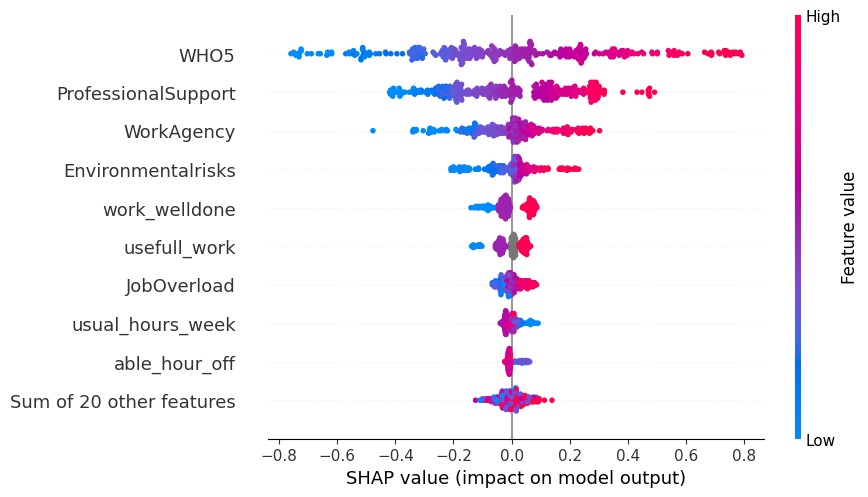

In [7]:

shap.plots.beeswarm(shap_values_list_xgb)


In [8]:
#shap.waterfall_plot(shap_values_list_xgb[2])


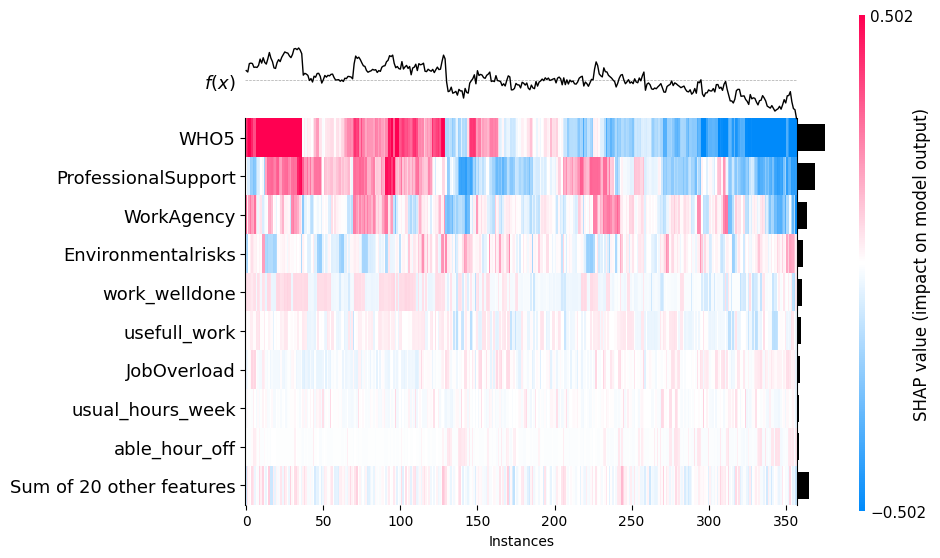

In [9]:
shap.plots.heatmap(shap_values_list_xgb)

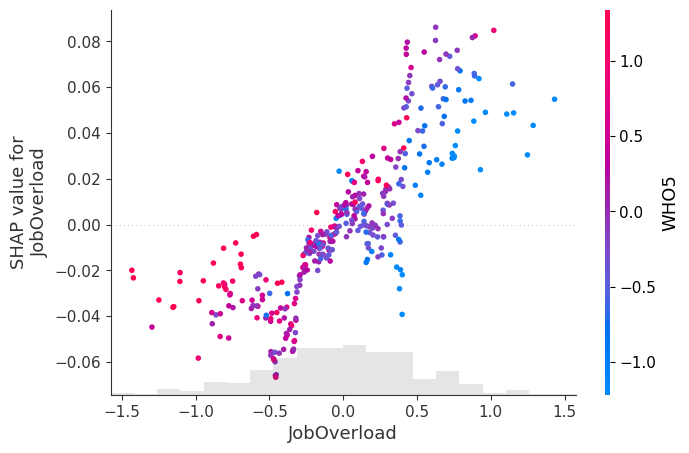

In [10]:
shap.plots.scatter(shap_values_list_xgb[:, "JobOverload"],color=shap_values_list_xgb)
#color=plt.get_cmap("cool")
#color=shap_values[:,"Workclass"])
